In [1]:
# class(es):
# Earthquake
# Location

quake_dicts = [{'place': 'southeast of the Loyalty Islands',
  'time': 1637538745422,
  'mag': 4.5,
  'loc': {'lat': -22.7976, 'lon': 171.963}},
 {'place': '5km ESE of Walker, CA',
  'time': 1637537593330,
  'mag': 1.19,
  'loc': {'lat': 38.504, 'lon': -119.429}},
 {'place': '19 km W of Cheyenne Wells, Colorado',
  'time': 1637537565440,
  'mag': 1.9,
  'loc': {'lat': 38.8551, 'lon': -102.5692}},
 {'place': '4 km NW of Point MacKenzie, Alaska',
  'time': 1637537529410,
  'mag': 1.7,
  'loc': {'lat': 61.3898, 'lon': -150.0462}},
 {'place': '15 km SE of Waynoka, Oklahoma',
  'time': 1637537486109,
  'mag': 1.51,
  'loc': {'lat': 36.473, 'lon': -98.7745}}]

def place_miles(quake):
    place = quake["place"]
    km_idx = place.find("km")
    if km_idx < 0:
        return place
    num = place[:km_idx].strip()
    if not num.isdigit():
        return place
    miles = round(float(num) * 0.621371, 2)
    return f"{miles} miles{place[km_idx+2:]}"

place_miles(quake_dicts[4])

'9.32 miles SE of Waynoka, Oklahoma'

In [50]:
class Location:
    def __init__(self, lat, lon):    # my only constructor (and it is always called __init__)
        self.lat = lat
        self.lon = lon
        
    def __repr__(self):         # this is a special method
        return f"Location({self.lat}, {self.lon})"
        
    def __str__(self):          # this is a special method
        return f"Location at lat {self.lat} and lon {self.lon}"
    
    def __eq__(self, other):
        return self.lat == other.lat and self.lon == other.lon
        
        
loc = Location(36.473, -98.7745)

In [51]:
loc   # uses loc.__repr__()

Location(36.473, -98.7745)

In [52]:
loc2 = Location(36.473, -98.7745)
loc2

Location(36.473, -98.7745)

In [53]:
loc == loc2   # shorthand for loc.__eq__(loc2)

True

In [16]:
print(loc)   # uses loc.__str__()

Location at lat 36.473 and lon -98.7745


In [5]:
loc.lat

36.473

In [7]:
s = "A\nB"
print(s)   # __str__ is for a broad audience
s          # __repr__ is for programmers

A
B


'A\nB'

In [40]:
    class Earthquake:
        def __init__(self, dict_values):
            self.place = dict_values["place"]
            self.time = dict_values["time"]
            self.mag = dict_values["mag"]
            self.loc = Location(dict_values["loc"]["lat"], dict_values["loc"]["lon"])

        def __repr__(self):
            return f"Magnitude {self.mag} earthquake at {self.place}"

        def _repr_html_(self):
            size = int(round(self.mag))
            size = 6 - size
            return f"<h{size}>Magnitude {self.mag} earthquake at {self.place}</h{size}>"

    e = Earthquake({
        'place': 'southeast of the Loyalty Islands',
        'time': 1637538745422,
        'mag': 4.5,
        'loc': {'lat': -22.7976, 'lon': 171.963}
    })

In [41]:
[
    Earthquake(quake_dicts[0]),
    Earthquake(quake_dicts[1])
]

[Magnitude 4.5 earthquake at southeast of the Loyalty Islands,
 Magnitude 1.19 earthquake at 5km ESE of Walker, CA]

In [42]:
Earthquake(quake_dicts[0])

Magnitude 4.5 earthquake at southeast of the Loyalty Islands

In [37]:
Earthquake(quake_dicts[1])

In [38]:
Earthquake(quake_dicts[2])

In [65]:
class Earthquake:
    def __init__(self, dict_values):
        self.place = dict_values["place"]
        self.time = dict_values["time"]
        self.mag = dict_values["mag"]
        self.loc = Location(dict_values["loc"]["lat"], dict_values["loc"]["lon"])
        
    def __repr__(self):
        return f"Magnitude {self.mag} earthquake at {self.place}"
    
    def _repr_html_(self):
        size = int(round(self.mag))
        size = 6 - size
        return f"<h{size}>Magnitude {self.mag} earthquake at {self.place}</h{size}>"
    
    def __lt__(self, quake2):
        return self.mag < quake2.mag

In [69]:
earthquakes = [Earthquake(d) for d in quake_dicts]
earthquakes.sort(reverse=True) # sort() is using obj1<obj2, which implicitly calls obj1.__lt__(obj2)
# earthquakes = sorted(earthquakes)
earthquakes

[Magnitude 4.5 earthquake at southeast of the Loyalty Islands,
 Magnitude 1.9 earthquake at 19 km W of Cheyenne Wells, Colorado,
 Magnitude 1.7 earthquake at 4 km NW of Point MacKenzie, Alaska,
 Magnitude 1.51 earthquake at 15 km SE of Waynoka, Oklahoma,
 Magnitude 1.19 earthquake at 5km ESE of Walker, CA]

In [70]:
earthquakes[0] < earthquakes[1]

False

In [74]:
# earthquakes[0] >= earthquakes[1] # need to implement __ge__

# obj[name] => obj.\_\_getitem\_\_(name)

In [75]:
for i in range(10):
    print(i)

0
1
2
3
4
5
6
7
8
9


In [79]:
r = range(2, 10)
print(r[-1])
print(r[0])
r

9
2


range(2, 10)

In [111]:
class Range:   # goal: be our own version of range(), with a different spelling
    def __init__(self, v1, v2=None):
        if v2 == None:
            self.lower = 0
            self.upper = v1
        else:
            self.lower = v1
            self.upper = v2
            
    def __getitem__(self, index):
        if index < 0:
            raise NotImplementedError("negative indexing not supported")
        if index >= self.upper-self.lower:
            raise IndexError("index too big")
        return self.lower+index
    
r = Range(2, 10)
print(r[1])  # WANT: 3
#print(r.__getitem__(0))

3


In [113]:
for num in r: # looks at r[0], r[1], r[2], keeps going until IndexError
    print(num)

2
3
4
5
6
7
8
9


In [108]:
r[100]

IndexError: index too big

In [109]:
r[-1]

NotImplementedError: negative indexing not supported

# "Context Managers" are objects that you can use with the "with" statement

In [115]:
f = open("file.txt", "w")
f.write("hello ")
assert 1 == 2 # CRASH HERE
f.write("world")
f.close()

AssertionError: 

In [116]:
with open("file.txt", "w") as f:
    f.write("hello ")
    assert 1 == 2 # CRASH HERE
    f.write("world")
    # "with" automatically closes the file at the end, even if there's an error

AssertionError: 

(<Figure size 100x100 with 1 Axes>, <AxesSubplot:>)

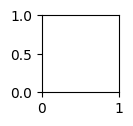

In [118]:
import matplotlib.pyplot as plt
plt.subplots(figsize=(1,1))

In [123]:
plt.rcParams["font.size"]

10.0

ENTER
ENTER
create large plot
EXIT
EXIT


(<Figure size 100x100 with 1 Axes>, <AxesSubplot:>)

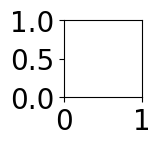

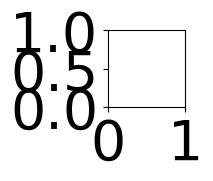

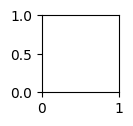

In [125]:
class DoubleFont:
    def __enter__(self):
        print("ENTER")
        self.old_size = plt.rcParams["font.size"]
        plt.rcParams["font.size"] *= 2
        
    def __exit__(self, exc_type, exc_value, traceback):
        print("EXIT")
        plt.rcParams["font.size"] = self.old_size

with DoubleFont():
    plt.subplots(figsize=(1,1)) # large font
    with DoubleFont():
        # CALL: obj.__enter__()
        print("create large plot")
        plt.subplots(figsize=(1,1)) # largest font
        # CALL: obj.__exit__(), even if we crash

plt.subplots(figsize=(1,1)) # regular font

In [127]:
dblfont = DoubleFont() # no __enter__ yet

In [128]:
with dblfont:
    pass

ENTER
EXIT
